#3.-VQE

### Setup

In [1]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 7.5 MB/s 
     |████████████████████████████████| 19.2 MB 1.4 MB/s 
     |████████████████████████████████| 240 kB 46.1 MB/s 
     |████████████████████████████████| 112 kB 43.8 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 37.5 MB 54.3 MB/s 
     |████████████████████████████████| 943 kB 54.5 MB/s 
     |████████████████████████████████| 50 kB 273 kB/s 
     |████████████████████████████████| 4.0 MB 32.3 MB/s 
     |████████████████████████████████| 1.9 MB 44.1 MB/s 
     |████████████████████████████████| 112 kB 52.0 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=e490faa74cbe9f374cf6dd56201870c0a4948ca3439682ad315abf412a4d8e8d
  Stored in directory: /root/.cache/pip/wheels/63/d0/9a/2571

In [2]:
pip install qiskit-nature

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 8.1 MB/s 


In [3]:
pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 7.6 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=2b637af860e6c0ea27d951be8c7b0eed4dffb01c24482d8495b70c609da70042
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [4]:
pip install pyscf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 1.3 MB/s 


In [5]:
token=""

##3.1- A simple example of VQE

In [6]:
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureMoleculeDriver, ElectronicStructureDriverType
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper

mol = Molecule(geometry=[['H', [0., 0., -0.37]],
                              ['H', [0., 0., 0.37]]],
                     charge=0, multiplicity=1)

driver = ElectronicStructureMoleculeDriver(mol, basis='sto3g', 
        driver_type=ElectronicStructureDriverType.PYSCF)
problem = ElectronicStructureProblem(driver)
qconverter = QubitConverter(JordanWignerMapper())
secqop = problem.second_q_ops()
print(secqop[0])
qhamiltonian = qconverter.convert(secqop[0])
print("Qubit Hamiltonian")
print(qhamiltonian)

Fermionic Operator
register length=4, number terms=36
  -1.2533097866459775 * ( +_0 -_0 )
+ -0.47506884877217725 * ( +_1 -_1 )
+ -1.2533097866459775 * ( +_2 -_2 )
+ -0.47506884877217725 * ( +_3 -_3 )
+ -0.3373779634072241 * ( +_0 +_0 -_0 -_0 )
+ -0.0 ...
Qubit Hamiltonian
-0.8121706072487122 * IIII
+ 0.17141282644776915 * IIIZ
- 0.22343153690813483 * IIZI
+ 0.17141282644776915 * IZII
- 0.22343153690813483 * ZIII
+ 0.12062523483390415 * IIZZ
+ 0.16868898170361205 * IZIZ
+ 0.04530261550379923 * YYYY
+ 0.04530261550379923 * XXYY
+ 0.04530261550379923 * YYXX
+ 0.04530261550379923 * XXXX
+ 0.16592785033770338 * ZIIZ
+ 0.16592785033770338 * IZZI
+ 0.1744128761226159 * ZIZI
+ 0.12062523483390415 * ZZII


/usr/local/lib/python3.7/dist-packages/qiskit_nature/problems/second_quantization/electronic/electronic_structure_problem.py:93: ListAuxOpsDeprecationWarning: List-based `aux_operators` are deprecated as of version 0.3.0 and support for them will be removed no sooner than 3 months after the release. Instead, use dict-based `aux_operators`. You can switch to the dict-based interface immediately, by setting `qiskit_nature.settings.dict_aux_operators` to `True`.
  second_quantized_ops = self._grouped_property_transformed.second_q_ops()


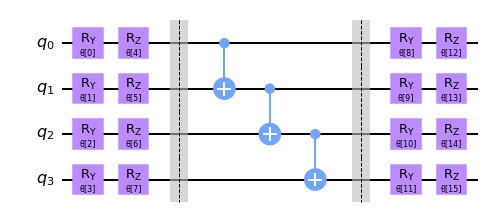

In [7]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=4, reps=1, entanglement="linear", insert_barriers = True)
ansatz.decompose().draw("mpl")

In [8]:
from qiskit.algorithms import VQE
from qiskit import Aer
from qiskit.utils import QuantumInstance
import numpy as np
from qiskit.algorithms.optimizers import COBYLA

seed = 1234
np.random.seed(seed)

optimizer = COBYLA()

initial_point = np.random.random(ansatz.num_parameters)
quantum_instance = QuantumInstance(backend = Aer.get_backend('aer_simulator_statevector'))

vqe = VQE(
    ansatz=ansatz,
    optimizer=optimizer,
    initial_point=initial_point,
    quantum_instance=quantum_instance
)

result = vqe.compute_minimum_eigenvalue(qhamiltonian)

print(result)


{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 888,
    'eigenstate': array([ 1.55163279e-09+7.04522580e-10j,  1.17994431e-06+6.29389934e-07j,
       -6.87287902e-05-1.19175176e-04j,  9.01607105e-09+1.75153048e-10j,
        3.17070261e-06-2.71251777e-05j, -9.23514532e-01-3.66685696e-01j,
       -6.50833666e-07-1.04178617e-06j, -6.40877389e-06-1.04499914e-05j,
       -1.33988128e-06+3.63309921e-07j,  1.08441415e-05+7.61755332e-08j,
        1.04578392e-01+4.15432635e-02j, -5.85921512e-06+4.47076415e-06j,
       -1.01179799e-09+1.85616927e-09j,  5.57085679e-05+5.29593190e-05j,
        1.47630244e-07+4.00357904e-08j,  1.51330159e-10+9.41869390e-10j]),
    'eigenvalue': (-1.8523881417094914+0j),
    'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(θ[7]): -0.10263498379273155,
                              ParameterVectorElement(θ[8]): 3.1416468430294864,
                              ParameterVectorElement(θ[9]): 2.4674114077579344e-05,
       

In [9]:
from qiskit.algorithms import NumPyMinimumEigensolver
solver = NumPyMinimumEigensolver()
result = solver.compute_minimum_eigenvalue(qhamiltonian)
print(result)

{   'aux_operator_eigenvalues': None,
    'eigenstate': VectorStateFn(Statevector([-1.53666363e-17-4.93701060e-20j,
             -4.57234900e-16-4.65250782e-16j,
              1.25565337e-17-2.11612780e-17j,
              4.73690908e-16-1.33060132e-16j,
              1.52564317e-16-1.40021223e-16j,
             -6.67316913e-01-7.36221442e-01j,
             -1.62999711e-16-2.24584031e-16j,
             -8.42710421e-17+6.43081213e-17j,
             -7.98957973e-17-1.35250844e-17j,
              1.90408979e-16+3.25517112e-16j,
              7.55826341e-02+8.33870007e-02j,
             -3.56170534e-17+9.82948865e-17j,
             -4.51619835e-16+1.70721750e-16j,
              1.91645940e-17-1.45775129e-16j,
             -4.79331105e-17+5.57184037e-17j,
             -3.62080563e-17+4.86380668e-17j],
            dims=(2, 2, 2, 2)), coeff=1.0, is_measurement=False),
    'eigenvalue': -1.852388173569583}


In [10]:
from qiskit.algorithms import VQD
solver = VQD(ansatz=ansatz,
    optimizer=optimizer,
    initial_point=initial_point,
    quantum_instance=quantum_instance,
    k = 2)
result = solver.compute_eigenvalues(qhamiltonian)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': array([ 888, 1000]),
    'eigenstates': ListOp([VectorStateFn(Statevector([ 1.55163279e-09+7.04522580e-10j,
              1.17994431e-06+6.29389934e-07j,
             -6.87287902e-05-1.19175176e-04j,
              9.01607105e-09+1.75153048e-10j,
              3.17070261e-06-2.71251777e-05j,
             -9.23514532e-01-3.66685696e-01j,
             -6.50833666e-07-1.04178617e-06j,
             -6.40877389e-06-1.04499914e-05j,
             -1.33988128e-06+3.63309921e-07j,
              1.08441415e-05+7.61755332e-08j,
              1.04578392e-01+4.15432635e-02j,
             -5.85921512e-06+4.47076415e-06j,
             -1.01179799e-09+1.85616927e-09j,
              5.57085679e-05+5.29593190e-05j,
              1.47630244e-07+4.00357904e-08j,
              1.51330159e-10+9.41869390e-10j],
            dims=(2, 2, 2, 2)), coeff=1.0, is_measurement=False), VectorStateFn(Statevector([-5.01605162e-02+4.38928908e-02j,
          

In [11]:
from qiskit_nature.algorithms import GroundStateEigensolver

solver = GroundStateEigensolver(qconverter, vqe)
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.852388141709
  - computed part:      -1.852388141709
~ Nuclear repulsion energy (Hartree): 0.715104339081
> Total ground state energy (Hartree): -1.137283802628
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.00001495]
    - computed part:      [0.0  0.0  0.00001495]
  > Dipole moment (a.u.): [0.0  0.0  -0.00001495]  Total: 0.00001495
                 (debye): [0.0  0.0  -0.000038]  Total: 0.000038
 


In [12]:
print(result.total_energies)

[-1.1372838]


##3.2- A more complicated ansatz

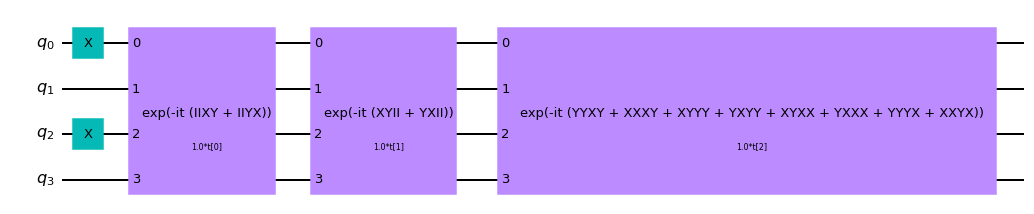

In [13]:
from qiskit_nature.algorithms import VQEUCCFactory

vqeuccf = VQEUCCFactory(quantum_instance = quantum_instance)
vqeuccf.get_solver(problem, qconverter).ansatz.decompose().draw(filename="ucc.png",output="mpl")

In [14]:
solver = GroundStateEigensolver(qconverter, vqeuccf)
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.852388173513
  - computed part:      -1.852388173513
~ Nuclear repulsion energy (Hartree): 0.715104339081
> Total ground state energy (Hartree): -1.137283834432
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  -0.00000013]
    - computed part:      [0.0  0.0  -0.00000013]
  > Dipole moment (a.u.): [0.0  0.0  0.00000013]  Total: 0.00000013
                 (debye): [0.0  0.0  0.00000033]  Total: 0.00000033
 


##3.3- Noisy simulation

In [15]:
from qiskit.providers.aer import AerSimulator
from qiskit import IBMQ

IBMQ.save_account(token)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
quantum_instance = QuantumInstance(backend = AerSimulator.from_backend(backend),
                                   seed_simulator=seed, seed_transpiler = seed)

vqe = VQE(
    ansatz=ansatz,
    optimizer=optimizer,
    initial_point=initial_point,
    quantum_instance=quantum_instance
    #shots=1024
)

solver = GroundStateEigensolver(qconverter, vqe)
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.747311899973
  - computed part:      -1.747311899973
~ Nuclear repulsion energy (Hartree): 0.715104339081
> Total ground state energy (Hartree): -1.032207560892
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 1.974 S: 0.114 S^2: 0.127 M: 0.004
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  -0.01453994]
    - computed part:      [0.0  0.0  -0.01453994]
  > Dipole moment (a.u.): [0.0  0.0  0.01453994]  Total: 0.01453994
                 (debye): [0.0  0.0  0.03695684]  Total: 0.03695684
 


In [16]:
from qiskit.utils.mitigation import CompleteMeasFitter

quantum_instance = QuantumInstance(backend = AerSimulator.from_backend(backend),
                                   measurement_error_mitigation_cls=CompleteMeasFitter,
                                   seed_simulator=seed, seed_transpiler = seed)


vqe = VQE(
    ansatz=ansatz,
    optimizer=optimizer,
    initial_point=initial_point,
    quantum_instance=quantum_instance
)

solver = GroundStateEigensolver(qconverter, vqe)
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.793658885562
  - computed part:      -1.793658885562
~ Nuclear repulsion energy (Hartree): 0.715104339081
> Total ground state energy (Hartree): -1.078554546481
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 1.981 S: 0.059 S^2: 0.063 M: -0.007
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  -0.09723587]
    - computed part:      [0.0  0.0  -0.09723587]
  > Dipole moment (a.u.): [0.0  0.0  0.09723587]  Total: 0.09723587
                 (debye): [0.0  0.0  0.2471489]  Total: 0.2471489
 


In [17]:
from qiskit_nature.runtime import VQEClient
#backend = provider.get_backend('ibm_nairobi')
backend = provider.get_backend('ibmq_qasm_simulator')

vqe = VQEClient(
    ansatz=ansatz,
    #optimizer=optimizer, DEFAULT -> SPSA
    provider=provider,
    backend=backend,
    #shots=1024,
    initial_point = initial_point,
    measurement_error_mitigation=False
)  


solver = GroundStateEigensolver(qconverter, vqe)
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857765239885
  - computed part:      -1.857765239885
~ Nuclear repulsion energy (Hartree): 0.715104339081
> Total ground state energy (Hartree): -1.142660900804
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.002 S: 0.007 S^2: 0.007 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  -0.00545248]
    - computed part:      [0.0  0.0  -0.00545248]
  > Dipole moment (a.u.): [0.0  0.0  0.00545248]  Total: 0.00545248
                 (debye): [0.0  0.0  0.01385882]  Total: 0.01385882
 


In [18]:
vqe = VQEClient(
    ansatz=ansatz,
    #optimizer=optimizer, DEFAULT -> SPSA
    provider=provider,
    backend=backend,
    #shots=1024,
    initial_point = initial_point,
    measurement_error_mitigation=True
)  # use a complete measurement fitter for error mitigation


solver = GroundStateEigensolver(qconverter, vqe)
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.830672022876
  - computed part:      -1.830672022876
~ Nuclear repulsion energy (Hartree): 0.715104339081
> Total ground state energy (Hartree): -1.115567683795
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.001 S: -0.004 S^2: -0.004 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  -0.04543732]
    - computed part:      [0.0  0.0  -0.04543732]
  > Dipole moment (a.u.): [0.0  0.0  0.04543732]  Total: 0.04543732
                 (debye): [0.0  0.0  0.11549014]  Total: 0.11549014
 
